<a href="https://colab.research.google.com/github/hbhb0311/Study/blob/main/Pytorch/PART2-DNN/Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
drop_prob = 0.3

In [4]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [6]:
# nn layers 
linear1 = torch.nn.Linear(784, 512, bias=True)
linear2 = torch.nn.Linear(512, 512, bias=True)
linear3 = torch.nn.Linear(512, 512, bias=True)
linear4 = torch.nn.Linear(512, 512, bias=True)
linear5 = torch.nn.Linear(512, 10, bias=True)
relu = torch.nn.ReLU()
dropout = torch.nn.Dropout(p = drop_prob) # Dropout 층 추가

In [7]:
# Initialization 
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)
torch.nn.init.xavier_uniform_(linear4.weight)
torch.nn.init.xavier_uniform_(linear5.weight)

Parameter containing:
tensor([[ 0.0251, -0.0916, -0.0188,  ...,  0.0029,  0.0504,  0.1029],
        [-0.0734,  0.0011,  0.0573,  ...,  0.0655,  0.0125,  0.0398],
        [-0.0573,  0.0138,  0.0445,  ..., -0.1055, -0.0635, -0.0175],
        ...,
        [-0.0040, -0.0163,  0.0353,  ...,  0.0114,  0.0532,  0.0911],
        [ 0.0213, -0.0448, -0.0146,  ..., -0.0185,  0.1002,  0.0140],
        [ 0.0202, -0.0097,  0.0296,  ..., -0.0134, -0.1033,  0.0581]],
       requires_grad=True)

In [8]:
model = torch.nn.Sequential(linear1, relu, dropout,
                            linear2, relu, dropout,
                            linear3, relu, dropout,
                            linear4, relu, dropout,
                            linear5).to(device)

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
total_batch = len(data_loader)


model.train() ## --> train 모드 설정 (dropout = True)
for epoch in range(training_epochs):
    avg_cost = 0
    
    for X, Y in data_loader:
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)
        # [batch_size, 1, 28, 28] = reshape => [batch_size, 784]
        
        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch
        
    print('Epoch: ', '%04d' % (epoch+1), 'cost = ', '{:.9f}'.format(avg_cost))

Epoch:  0001 cost =  0.311230421
Epoch:  0002 cost =  0.144154385
Epoch:  0003 cost =  0.115779042
Epoch:  0004 cost =  0.093699366
Epoch:  0005 cost =  0.085402012
Epoch:  0006 cost =  0.072329834
Epoch:  0007 cost =  0.066053309
Epoch:  0008 cost =  0.062671483
Epoch:  0009 cost =  0.060720094
Epoch:  0010 cost =  0.056215156
Epoch:  0011 cost =  0.052819069
Epoch:  0012 cost =  0.047445431
Epoch:  0013 cost =  0.049201287
Epoch:  0014 cost =  0.045062393
Epoch:  0015 cost =  0.041712400


In [10]:
# grad 사용하지 않음
with torch.no_grad():
    model.eval() ## ==> evaluation mode 설정 (dropout = False)
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy : ', accuracy.item())

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy :  0.9779000282287598


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Label:  5
Prediction:  5


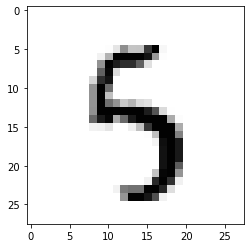

In [11]:
import matplotlib.pyplot as plt
import random

# get one and predict 

r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r: r+1].view(-1, 28 * 28).float().to(device)
Y_single_data = mnist_test.test_labels[r: r+1].to(device)

print('Label: ', Y_single_data.item())
single_prediction = model(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())

plt.imshow(mnist_test.test_data[r: r+1].view(28, 28), cmap = 'Greys', interpolation = 'nearest')
plt.show()